In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Load and Visualise the Data
# - Download
# - Load
# - Visualise
# - Normalise

In [3]:
X = pd.read_csv('./Linear_X_Train.csv')
y = pd.read_csv('./Linear_Y_Train.csv')


In [4]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [5]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


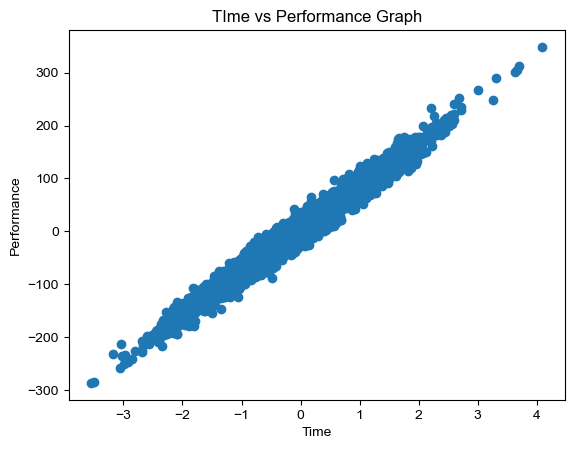

In [6]:
plt.scatter(X , y)
plt.style.use('seaborn-v0_8')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.title('TIme vs Performance Graph')

# normalise the data
u = X.mean()
sd = X.std()

X = (X - u)/sd

plt.show()


In [7]:
### Linear Regression

X = X.to_numpy()
y = y.to_numpy()    


In [8]:
type(X) , type(y)

(numpy.ndarray, numpy.ndarray)

In [9]:
def hypothesis(x , theta):
    return theta[0] + theta[1]*x

def gradient(X , Y , theta):
    m = len(X)
    grad0 = 0.0
    grad1 = 0.0
    
    for i in range(m):
        hypo = hypothesis(X[i] , theta)
        grad0 += (hypo - Y[i])
        grad1 += (hypo - Y[i])*X[i]
    
    grad0/=m
    grad1/=m
    
    return np.array([grad0 , grad1])

def error(X , Y , theta):
    length = len(X)
    total_error = 0.0
    
    for i in range(length):
        hypo = hypothesis(X[i] , theta)
        yval = Y[i]
        
        total_error += (hypo - yval)**2
        
        
    total_error/=length
    
    return total_error
        
    
    


def gradientDescent(X , Y , learningrate = 0.1 , max_steps = 1000):
    
    theta0 = 0.0
    theta1 = 0.0
    
    theta = [theta0 , theta1]
    
    error_list = []
    
#     grad = gradient(X , Y , theta)
    
    for i in range(max_steps):
        grad = gradient(X , Y , theta)
        theta[0] = theta[0] - learningrate*grad[0]
        theta[1] = theta[1] - learningrate*grad[1]
#         theta = [theta0 , theta1]
        error_list.append(error(X , Y , theta))
    
    return np.array(theta) , error_list


theta , error_list = gradientDescent(X , y)

    
    



        

In [10]:
theta

array([[ 0.68386897],
       [79.91639317]])

In [11]:
error_list

[array([5363.4315836]),
 array([4380.90940714]),
 array([3585.0192859]),
 array([2940.3100872]),
 array([2418.06469202]),
 array([1995.02085561]),
 array([1652.3350432]),
 array([1374.74308719]),
 array([1149.88027919]),
 array([967.73061192]),
 array([820.18063876]),
 array([700.65807852]),
 array([603.83906797]),
 array([525.41102239]),
 array([461.88054114]),
 array([410.41780204]),
 array([368.73051331]),
 array([334.96180856]),
 array([307.60753691]),
 array([285.44926394]),
 array([267.49999931]),
 array([252.96023344]),
 array([241.18232522]),
 array([231.64165425]),
 array([223.91325284]),
 array([217.65287676]),
 array([212.58167165]),
 array([208.47375211]),
 array([205.14614011]),
 array([202.45061468]),
 array([200.2671097]),
 array([198.49836587]),
 array([197.06559846]),
 array([195.9049881]),
 array([194.964838]),
 array([194.20327129]),
 array([193.58636571]),
 array([193.08664258]),
 array([192.68184285]),
 array([192.35393565]),
 array([192.08831507]),
 array([191.873

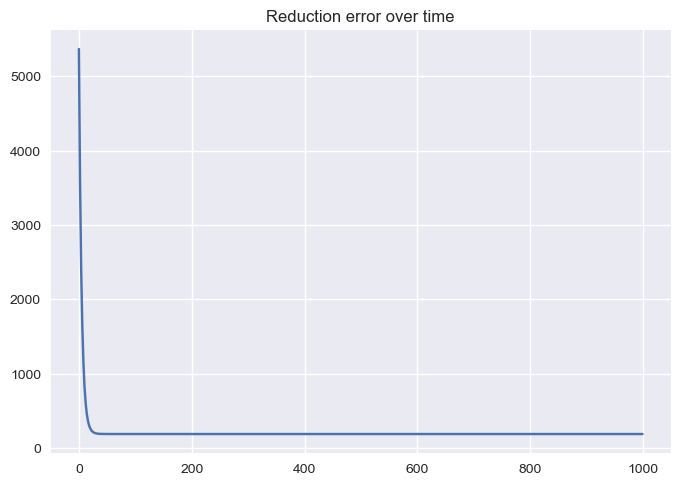

In [12]:
plt.plot(error_list)
plt.title('Reduction error over time')
plt.show()

In [13]:
### Predictions and Best Line

y_ = hypothesis(X , theta)
print(y_)


[[-19.57388181]
 [-43.69687794]
 [ 86.48717332]
 ...
 [-20.85100092]
 [138.7056574 ]
 [-35.87992564]]


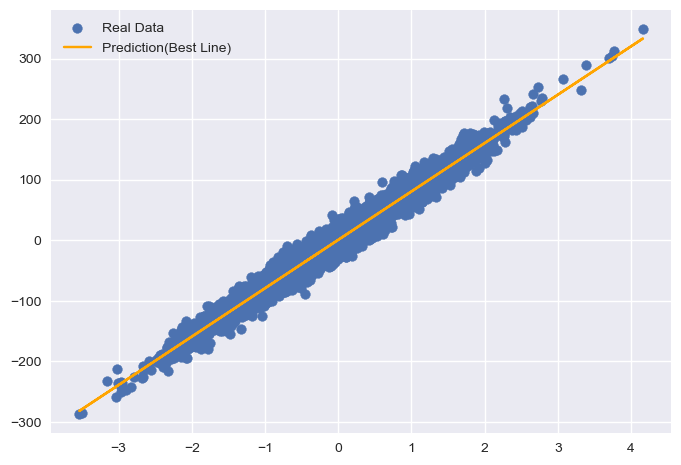

In [14]:
# Training + Predictions

plt.scatter(X , y , label= 'Real Data')
plt.plot(X , y_, color= 'orange' , label='Prediction(Best Line)')
plt.legend()

plt.show()

In [15]:
# Loading the Test Data

X_test = pd.read_csv('./Linear_X_Test.csv')
X_test.head()
X_test = X_test.values


In [16]:
type(X_test)

numpy.ndarray

In [17]:
Y_test = hypothesis(X_test , theta)
print(Y_test)

[[-149.39467518]
 [ -68.7660273 ]
 [-201.51918447]
 ...
 [  10.91379233]
 [ -21.53589237]
 [ -53.6932771 ]]


In [18]:
df = pd.DataFrame(Y_test, columns=['y'])
df.head()

,y
0,-149.394675
1,-68.766027
2,-201.519184
3,221.269533
4,47.914468


In [19]:
df.to_csv('y_prediction.csv' , index = False)

In [20]:
### COmputing Score
### How good is our linear regression

# check on the training data

# Score: R2 (R-Squared) or Coefficient of Determination

# R2 Score = 1 - summation((y - y-predicted)**2)/summation((y - yavg)**2)

# highest value -> 1 lowest value -> 0


def r2Score(Y , Y_pred):
    num = np.sum((Y - Y_pred)**2)
    den = np.sum((Y - Y.mean())**2)
    return (1 - num/den)*100


 

In [21]:
r2Score(y , y_)

97.09612233822354

In [22]:
# Visualising the Loss Function

theta

array([[ 0.68386897],
       [79.91639317]])

In [27]:
from mpl_toolkits.mplot3d import Axes3D

T0 = np.arange(-50 , 50 , 1)
T1 = np.arange(40,120,1)

(T0 , T1)

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49]),
 array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 1

In [28]:
T0 , T1 = np.meshgrid(T0 , T1)

(T0 , T1)

(array([[-50, -49, -48, ...,  47,  48,  49],
        [-50, -49, -48, ...,  47,  48,  49],
        [-50, -49, -48, ...,  47,  48,  49],
        ...,
        [-50, -49, -48, ...,  47,  48,  49],
        [-50, -49, -48, ...,  47,  48,  49],
        [-50, -49, -48, ...,  47,  48,  49]]),
 array([[ 40,  40,  40, ...,  40,  40,  40],
        [ 41,  41,  41, ...,  41,  41,  41],
        [ 42,  42,  42, ...,  42,  42,  42],
        ...,
        [117, 117, 117, ..., 117, 117, 117],
        [118, 118, 118, ..., 118, 118, 118],
        [119, 119, 119, ..., 119, 119, 119]]))

In [31]:
T0.shape , T1.shape

((80, 100), (80, 100))

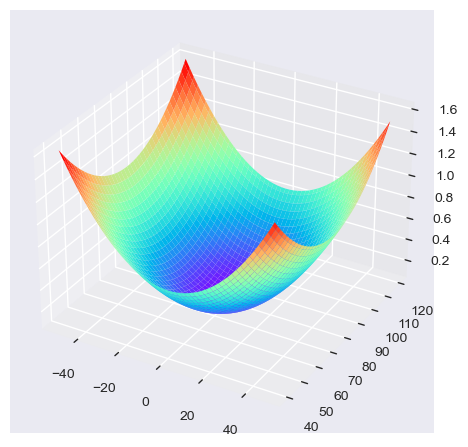

In [35]:
Z = np.zeros(T0.shape)

for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        y_ = T0[i , j] + T1[i , j]*X
        Z[i , j] = np.sum((y - y_)**2)

# Visualise the loss function

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(T0 , T1 , Z, cmap= 'rainbow')
plt.show()


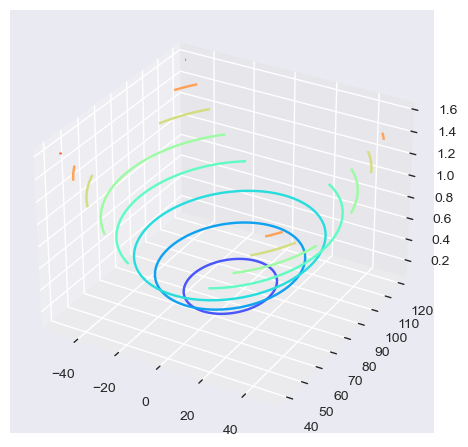

In [36]:
# Contour Plot

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.contour(T0 , T1 , Z, cmap= 'rainbow')
plt.show()
